In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os, json
from os.path import dirname
from pandas import DataFrame, concat
from tqdm import tqdm
import seaborn as sns 


from parse_fctask import get_data_acq, get_data_rec


In [2]:
dir = '../data/data_july_24/'
acq_ext_files = glob('{}s*_scream_acq_ext_*[0-9].json'.format(dir))
rec_files = glob('{}s*_scream_recovery_*[0-9].json'.format(dir))

DATA_ACQEXT = get_data_acq(acq_ext_files, 20)
DATA_REC = get_data_rec(rec_files, 20)

100%|██████████| 18/18 [00:00<00:00, 102.58it/s]


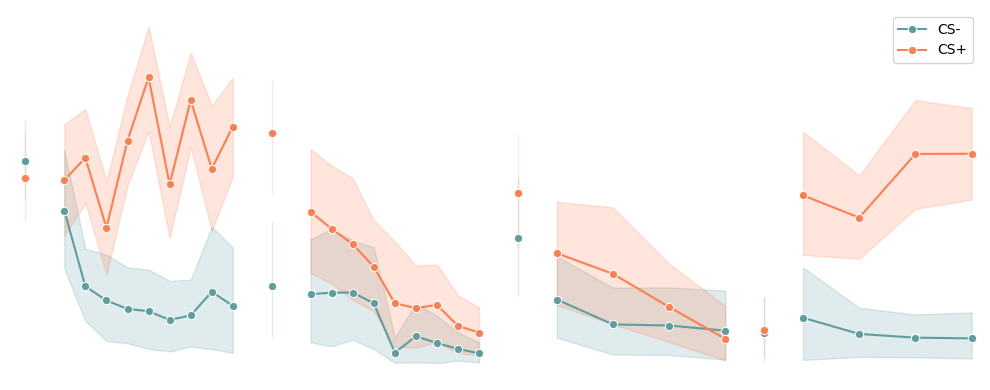

In [3]:
fig, ax = plt.subplots(1,8, figsize=(10,4), width_ratios=[1, 6,1,6,1,6,1,6], sharey=True)


# pre acq
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial==0)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[0], legend=False)
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial==0)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[0], legend=False)
#  acq
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial>0) & (DATA_ACQEXT.er_trial<=9)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[1], legend=False)
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial>0) & (DATA_ACQEXT.er_trial<=9)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[1], legend=False)

#  between acq and ext
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial==10)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[2], legend=False)
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial==10)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[2], legend=False)

#ext

sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial>10) & (DATA_ACQEXT.er_trial<=19)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[3], legend=False)
sns.lineplot(data = DATA_ACQEXT[(DATA_ACQEXT.er_trial>10) & (DATA_ACQEXT.er_trial<=19)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[3], legend=False)

# pre rec
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial==0)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[4], legend=False)
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial==0)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[4], legend=False)

#rec
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial>0) & (DATA_REC.er_trial<=4)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[5], legend=False)
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial>0) & (DATA_REC.er_trial<=4)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[5], legend=False)


#between 
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial==5)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[6], legend=False)
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial==5)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[6], legend=False)

# rel
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial>5) & (DATA_REC.er_trial<=12)], x='er_trial',y='csMinusRating', 
             marker='o', color='cadetblue', label='CS-', ax=ax[7], legend=True)
sns.lineplot(data = DATA_REC[(DATA_REC.er_trial>5) & (DATA_REC.er_trial<=12)], x='er_trial',y='csPlusRating',  
             marker='o', color='coral', label='CS+', ax=ax[7], legend=True)


for ax_ in ax:
    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.set_xlabel('')
    ax_.set_ylabel('')

  
sns.despine(top=True, right=True, left=True, bottom=True,)
plt.tight_layout()
plt.show()